#Importing the libraries

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

TensorFlow version: 2.9.2


# Initialize train and test dataset

Making the grids

In [3]:
modinfo = np.loadtxt('modinfo.csv',dtype=float,delimiter=',')

In [4]:
allegrids = []
for ii in range(len(modinfo)):
  grid = np.zeros((200,200))
  for kk in range(np.int(np.round(modinfo[ii,0]))):
      for jj in range(200):
        grid[kk,jj] = modinfo[ii,2]

  for kk in range(np.int(np.round(modinfo[ii,0])),200):
    for jj in range(200):
      grid[kk,jj] = modinfo[ii,3]

  tanding = np.abs(np.round(np.tan(np.deg2rad(modinfo[ii,1])) * 200/2))
  for mm in range(100,200):
    for kk in range(max(0,np.int(-(mm-100)*tanding/100 + np.int(np.round(modinfo[ii,0])))),np.int(np.round(modinfo[ii,0]))):
      grid[kk,mm] =  modinfo[ii,3]

  for mm in range(0,100):
    for kk in range(np.int(np.round(modinfo[ii,0])),min(200,np.int(-(mm-100)*tanding/100 + np.int(np.round(modinfo[ii,0]))))):
      grid[kk,mm] =  modinfo[ii,2]
  allegrids.append(grid)
#reduce dimension (for minimal RAM usage)
herschaalmod = Sequential()
herschaalmod.add(MaxPooling2D(3, 3))
herschaalmod.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
X = np.array(allegrids).reshape(len(allegrids), 200,200,1)
kleinegrids = herschaalmod.predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

230/230 [==============================] - 7s 28ms/step


In [5]:
targetdata = np.loadtxt('verschilgeschaald.csv',dtype=float,delimiter=',') #data that we want to predict
dim_targetdata = 99 #number of values that need to be predicted per input point
grids = kleinegrids #input igures
dimgrids = 66 #dimensionality of the grids
train_size = 5000 #number of datapoints in the train dataset
test_size = 177 #number of datapoints in the test dataset
dim_latent_space = 5 #dimension of the latent space representation

In [6]:
indexen = range(len(targetdata))
X_trainges, X_testges, indexen_trainges_final, indexen_testges_final = train_test_split(grids, indexen, train_size=train_size, test_size=test_size, random_state=333)
training_yges = targetdata[indexen_trainges_final]
y_testges = targetdata[indexen_testges_final]

In [7]:
X1 = np.array(X_trainges).reshape(len(X_trainges), dimgrids,dimgrids,1)
Y = np.array(training_yges).reshape(len(training_yges), dim_targetdata)

# Make the model

In [8]:
models = Sequential()
models.add(Conv2D(9,kernel_size=5,activation='relu',input_shape=(dimgrids, dimgrids, 1)))
models.add(MaxPooling2D(2, 2))
models.add(Flatten())
models.add(Dense(512, activation='relu'))
models.add(Dropout(0.1))
models.add(Dense(dim_targetdata))
models.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
models.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 9)         234       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 9)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8649)              0         
                                                                 
 dense (Dense)               (None, 512)               4428800   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 99)                50787     
                                                      

In [9]:
hists = models.fit(X1, Y, epochs=500,validation_split=0.2,batch_size=32)

Epoch 1/500
125/125 [==============================] - 24s 188ms/step - loss: 7.7513 - accuracy: 0.0295 - val_loss: 0.0192 - val_accuracy: 0.0700
Epoch 2/500
125/125 [==============================] - 15s 120ms/step - loss: 7.7297 - accuracy: 0.0512 - val_loss: 0.0135 - val_accuracy: 0.0470
Epoch 3/500
125/125 [==============================] - 15s 116ms/step - loss: 7.7183 - accuracy: 0.0367 - val_loss: 0.0135 - val_accuracy: 0.0260
Epoch 4/500
125/125 [==============================] - 13s 103ms/step - loss: 7.6849 - accuracy: 0.0405 - val_loss: 0.0238 - val_accuracy: 0.0260
Epoch 5/500
125/125 [==============================] - 14s 110ms/step - loss: 7.6000 - accuracy: 0.0285 - val_loss: 0.1302 - val_accuracy: 0.0390
Epoch 6/500
125/125 [==============================] - 13s 106ms/step - loss: 7.5045 - accuracy: 0.0235 - val_loss: 0.0869 - val_accuracy: 0.0700
Epoch 7/500
125/125 [==============================] - 13s 106ms/step - loss: 7.2451 - accuracy: 0.0620 - val_loss: 0.0356 -

Final prediction

In [10]:
X_input = np.array(grids).reshape(len(grids), dimgrids,dimgrids,1)
predictie = models.predict(X_input)

230/230 [==============================] - 7s 31ms/step


Text(0.5, 0, 'Time')

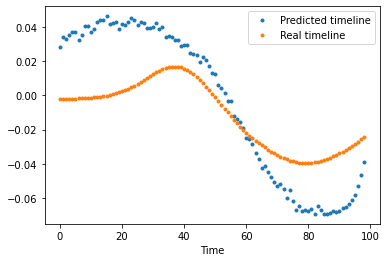

In [15]:
plt.plot(predictie[900],'.',label='Predicted timeline')
plt.plot(targetdata[900],'.',label='Real timeline')
plt.legend()
plt.xlabel('Time')

Text(0.5, 0, 'Depth')

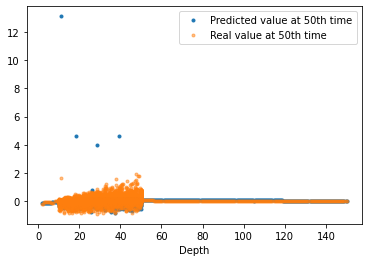

In [16]:
plt.plot(modinfo[:,0],predictie[:,50],'.',label='Predicted value at 50th time')
plt.plot(modinfo[:,0],targetdata[:,50],'.',alpha=0.5,label='Real value at 50th time')
plt.legend()
plt.xlabel('Depth')